In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import seaborn as sns
import nltk
sns.set_style("whitegrid")
# import altair as alt
# alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 4000

In [2]:
# df_path = "/home/lnc/0. Latest News Classifier/01. Dataset Creation/"
df_path = 'data/'
df_temp1 = pd.read_csv(df_path + 'articles1.csv')
df_temp2 = pd.read_csv(df_path + 'articles2.csv')
df_temp3 = pd.read_csv(df_path + 'articles3.csv')

df_temp = df_temp1.append(df_temp2).append(df_temp3)

In [3]:
df_temp.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [4]:
df = df_temp.set_index('id')[['title','publication', 'year', 'content', 'author']]
df['content_len'] = df['content'].apply(len)

In [5]:
df.shape

(142570, 6)

In [6]:
pd.options.display.max_rows = 4000

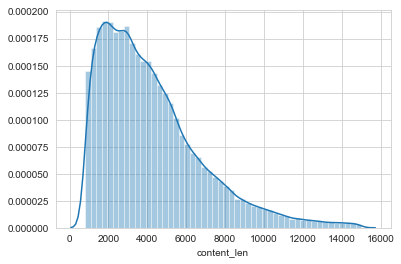

In [7]:
sns.distplot(df.loc[df.content_len.between(800, 15000),'content_len'], bins=50)

plt.show()

In [123]:
authors = ['Camila Domonoske','Joel B. Pollak','Daniel Nussbaum','Jerome Hudson']
df_2 = df.loc[df.author.isin(authors)]
# df[['author', 'publication', '']].groupby(['author', 'publication']).size().sort_values(ascending = False)[3:20]

In [59]:
authors = []
for i in range(len(df[['author', 'publication']].groupby(['author', 'publication']).size().sort_values(ascending = False)[:20].index)):
    u,v = df[['author', 'publication']].groupby(['author', 'publication']).size().sort_values(ascending = False)[:20].index[i]
    authors.append(u)

In [60]:
authors

['Breitbart News',
 'Pam Key',
 'Associated Press',
 'Charlie Spiering',
 'Jerome Hudson',
 'John Hayward',
 'Daniel Nussbaum',
 'AWR Hawkins',
 'Ian Hanchett',
 'Joel B. Pollak',
 'Post Editorial Board',
 'Alex Swoyer',
 'Camila Domonoske',
 'Warner Todd Huston',
 'NPR Staff',
 'Jeff Poor',
 'Merrit Kennedy',
 'Trent Baker',
 'Breitbart London',
 'Katherine Rodriguez']

In [70]:
df[['author', 'publication']].groupby(['author', 'publication']).size().sort_values(ascending = False)[3:20]


author                publication  
Charlie Spiering      Breitbart        928
Jerome Hudson         Breitbart        806
John Hayward          Breitbart        747
Daniel Nussbaum       Breitbart        735
AWR Hawkins           Breitbart        720
Ian Hanchett          Breitbart        647
Joel B. Pollak        Breitbart        624
Post Editorial Board  New York Post    620
Alex Swoyer           Breitbart        604
Camila Domonoske      NPR              593
Warner Todd Huston    Breitbart        545
NPR Staff             NPR              514
Jeff Poor             Breitbart        505
Merrit Kennedy        NPR              484
Trent Baker           Breitbart        457
Breitbart London      Breitbart        447
Katherine Rodriguez   Breitbart        435
dtype: int64

In [55]:
authors

[('Breitbart News', 'Breitbart'),
 ('Pam Key', 'Breitbart'),
 ('Associated Press', 'New York Post'),
 ('Charlie Spiering', 'Breitbart'),
 ('Jerome Hudson', 'Breitbart'),
 ('John Hayward', 'Breitbart'),
 ('Daniel Nussbaum', 'Breitbart'),
 ('AWR Hawkins', 'Breitbart'),
 ('Ian Hanchett', 'Breitbart'),
 ('Joel B. Pollak', 'Breitbart'),
 ('Post Editorial Board', 'New York Post'),
 ('Alex Swoyer', 'Breitbart'),
 ('Camila Domonoske', 'NPR'),
 ('Warner Todd Huston', 'Breitbart'),
 ('NPR Staff', 'NPR'),
 ('Jeff Poor', 'Breitbart'),
 ('Merrit Kennedy', 'NPR'),
 ('Trent Baker', 'Breitbart'),
 ('Breitbart London', 'Breitbart'),
 ('Katherine Rodriguez', 'Breitbart')]

In [10]:
df.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic', 'Fox News', 'Talking Points Memo', 'Buzzfeed News',
       'National Review', 'New York Post', 'Guardian', 'NPR', 'Reuters',
       'Vox', 'Washington Post'], dtype=object)

In [11]:
import matplotlib.pyplot as plt

In [12]:

authors = ['John Hayward',
'Daniel Nussbaum',
'AWR Hawkins', 
'Joel B. Pollak']      
authorsauthors

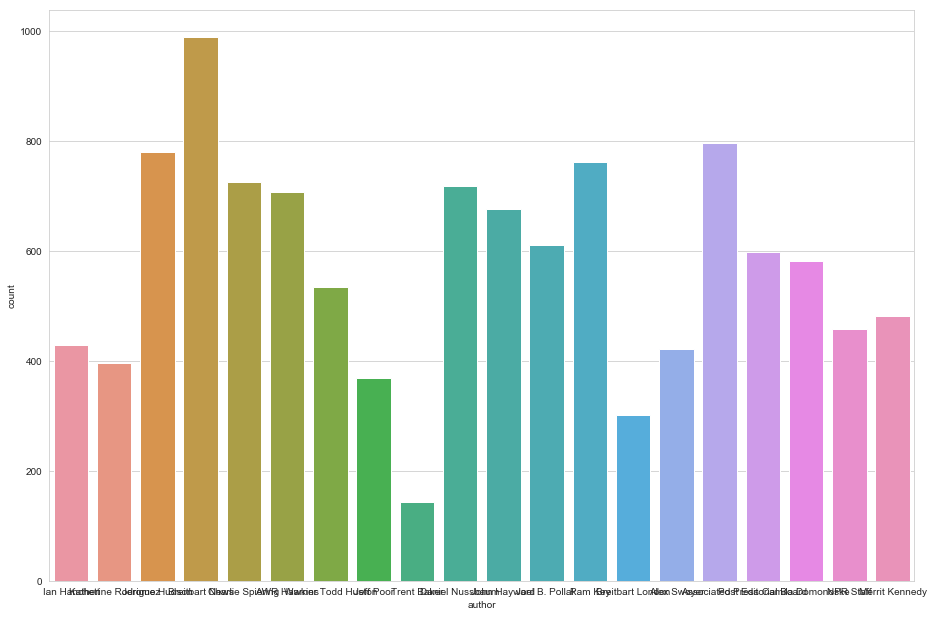

In [71]:
fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)
sns.countplot(x="author", data=df.loc[df.content_len.between(1000, 10000) & df.author.isin(authors)])
plt.show()

In [107]:
df[['author', 'publication', 'content_len']].groupby(['author', 'publication']).size().sort_values(ascending = False)[3:20]
cay = df_2[['author', 'publication', 'content_len']].groupby(['author', 'publication']).agg(['size','median', 'mean'])[('content_len', 'size')] * df_2[['author', 'publication', 'content_len']].groupby(['author', 'publication']).agg(['size','median', 'mean'])[('content_len', 'mean')]
# .agg('content_len', 'size')
# .sort_values(by = ('content_len', 'size'),ascending = False)[3:20]

In [122]:
authors = ['Camila Domonoske','Joel B. Pollak','Daniel Nussbaum','Jerome Hudson']

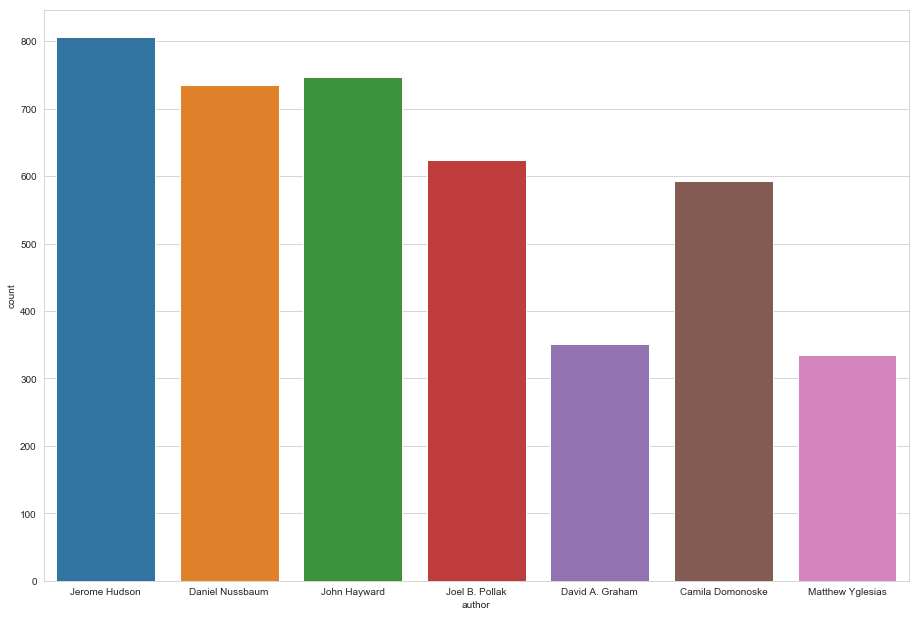

In [119]:
fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)
sns.countplot(x="author", data=df.loc[df.author.isin(authors)])
plt.show()

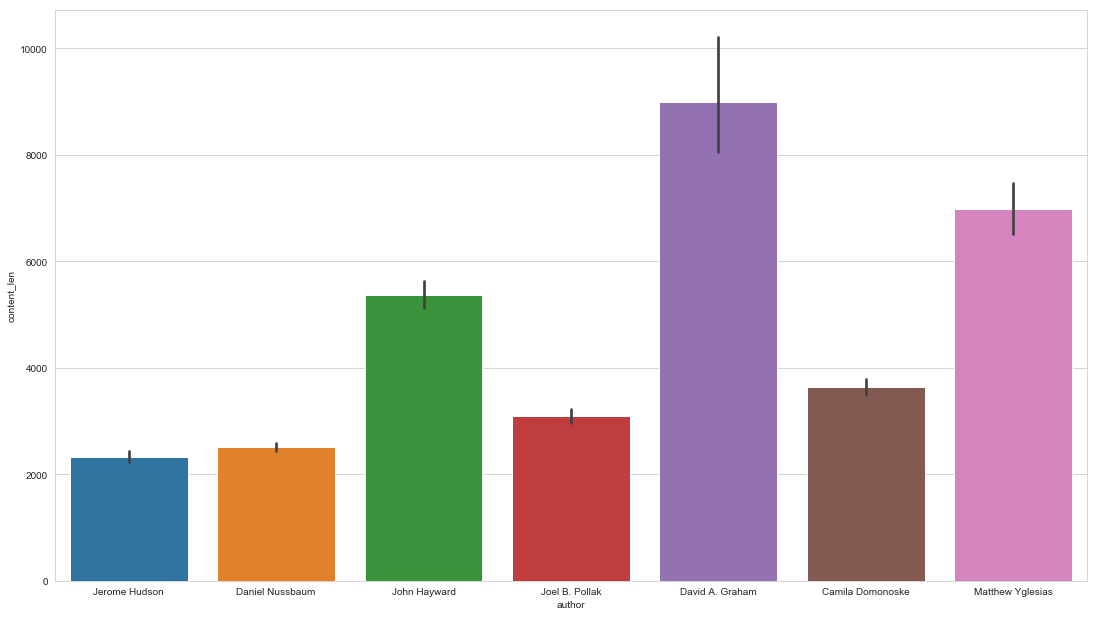

In [121]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="author", y="content_len", data=df.loc[df.author.isin(authors)])
plt.show()

In [117]:
for i in cay.sort_values(ascending = False)[:10].index


MultiIndex([(    'John Hayward',     'Breitbart'),
            (  'Breitbart News',     'Breitbart'),
            ('Associated Press', 'New York Post'),
            ('Camila Domonoske',           'NPR'),
            ('Matthew Yglesias',           'Vox'),
            ( 'David A. Graham',      'Atlantic'),
            (  'Joel B. Pollak',     'Breitbart'),
            (       'NPR Staff',           'NPR'),
            ( 'Daniel Nussbaum',     'Breitbart'),
            (   'Jerome Hudson',     'Breitbart')],
           names=['author', 'publication'])

In [114]:
cay.sort_values(ascending = False)

AttributeError: 'Series' object has no attribute 'author'

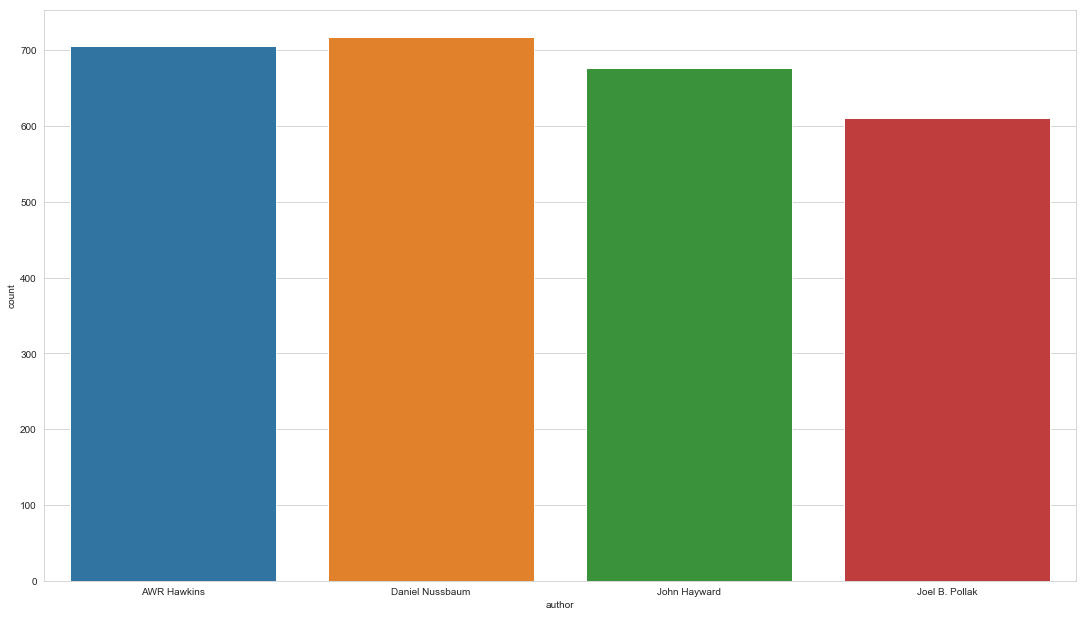

In [23]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.countplot(x="author", data=df.loc[df.content_len.between(1000, 10000) & df.author.isin(['John Hayward',
'Daniel Nussbaum',
'AWR Hawkins', 
'Joel B. Pollak'])])
plt.show()

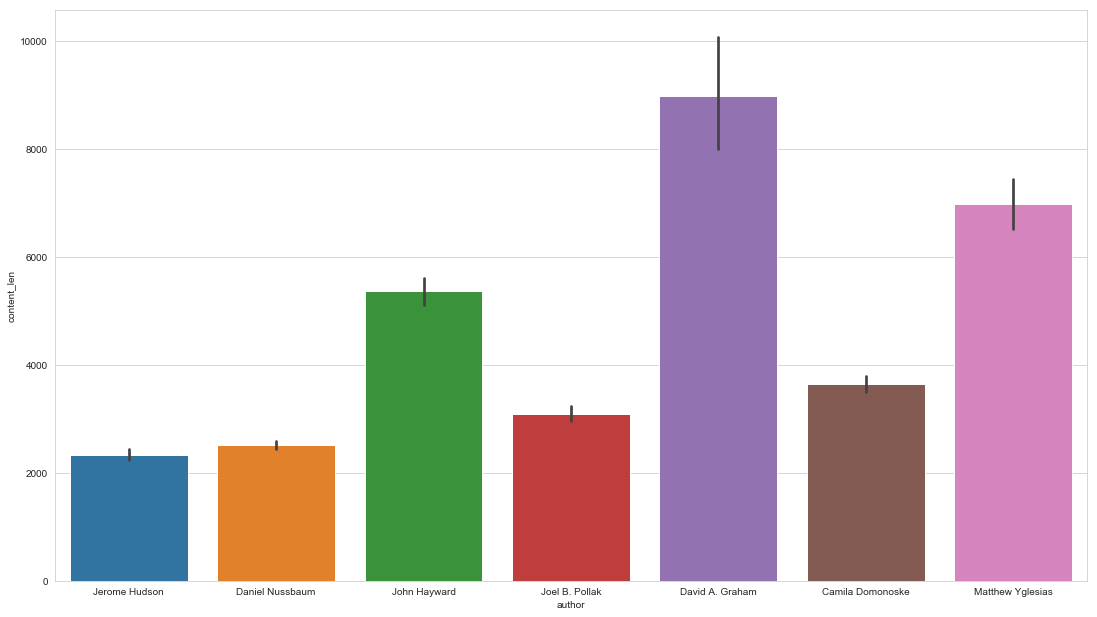

In [120]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="author", y="content_len", data=df.loc[df.author.isin(authors)])
plt.show()

In [24]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publica", y="content_len", data=df_2.loc[df_2.content_len])
plt.show()

NameError: name 'df_2' is not defined

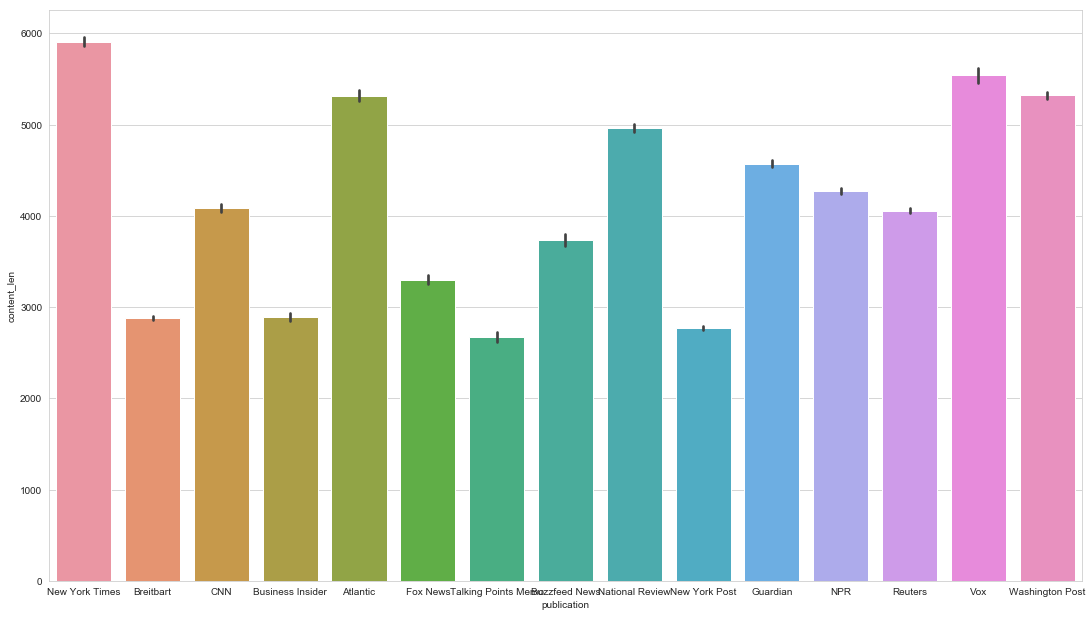

In [25]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publication", y="content_len", data=df.loc[df.content_len.between(1000, 10000)])
plt.show()

In [26]:
df_2 = df.loc[df.content_len.between(1000, 10000) & df.author.isin(['John Hayward',
'Daniel Nussbaum',
'AWR Hawkins', 
'Joel B. Pollak'])].drop_duplicates()

In [ ]:
df.content_len.between(1000, 10000) & df.author.isin(['John Hayward',
'Daniel Nussbaum',
'AWR Hawkins', 
'Joel B. Pollak']

In [27]:
df_2.shape

(2710, 6)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="author", y="content_len", data=df.loc[df.author.isin(authors)])
plt.show()

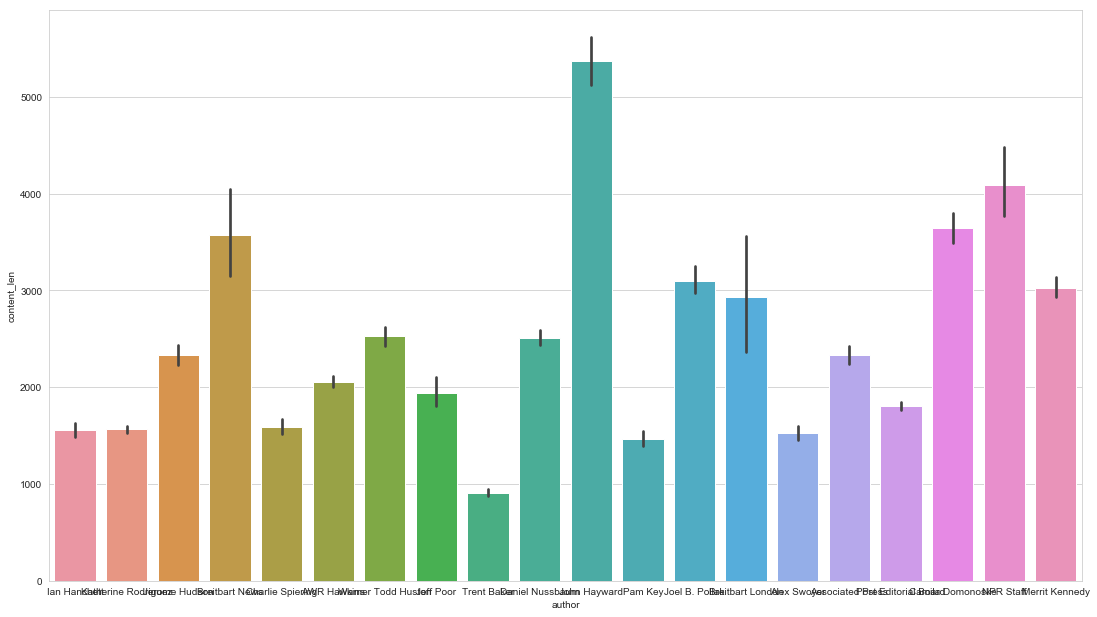

In [62]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="author", y="content_len", data=df.loc[df.author.isin(authors)])
plt.show()

In [ ]:
df_2.head()

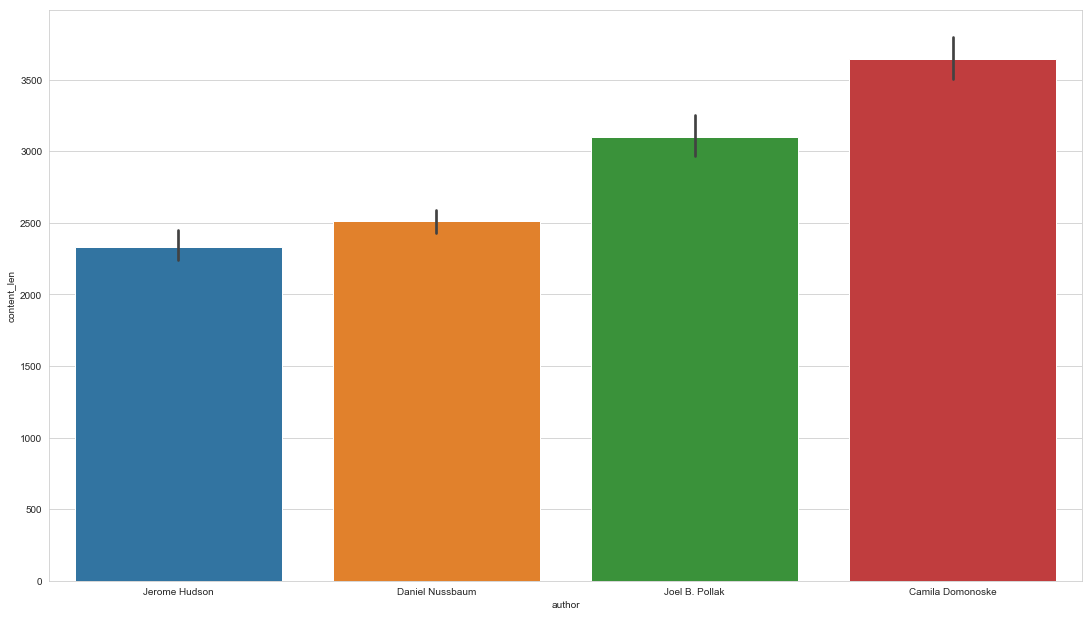

In [124]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="author", y="content_len", data=df_2)
plt.show()

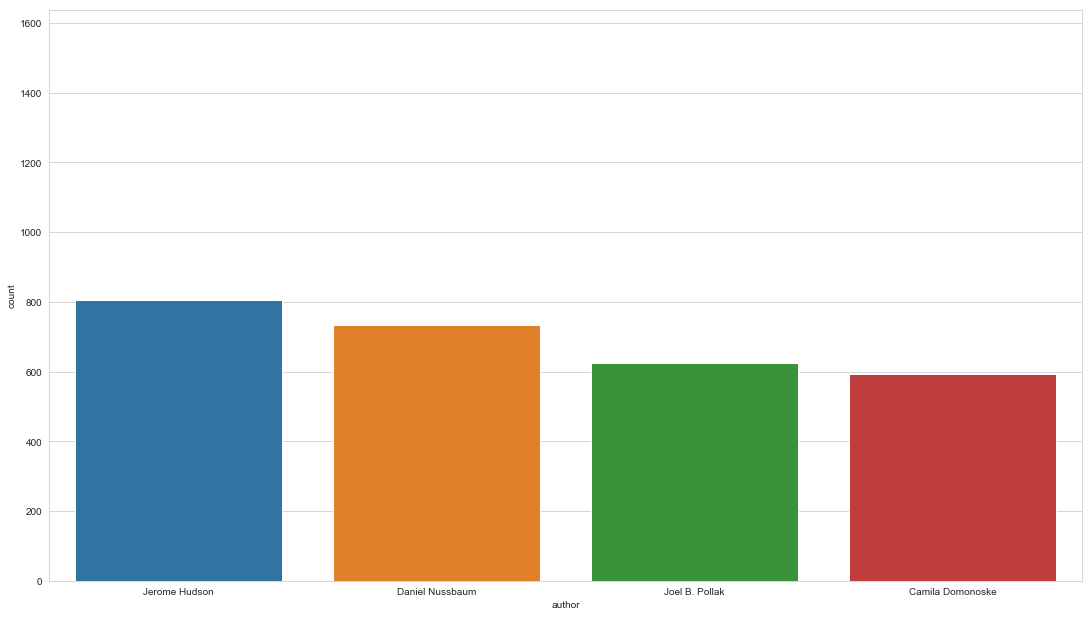

In [126]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.countplot(x="author", data=df_2)
plt.show()

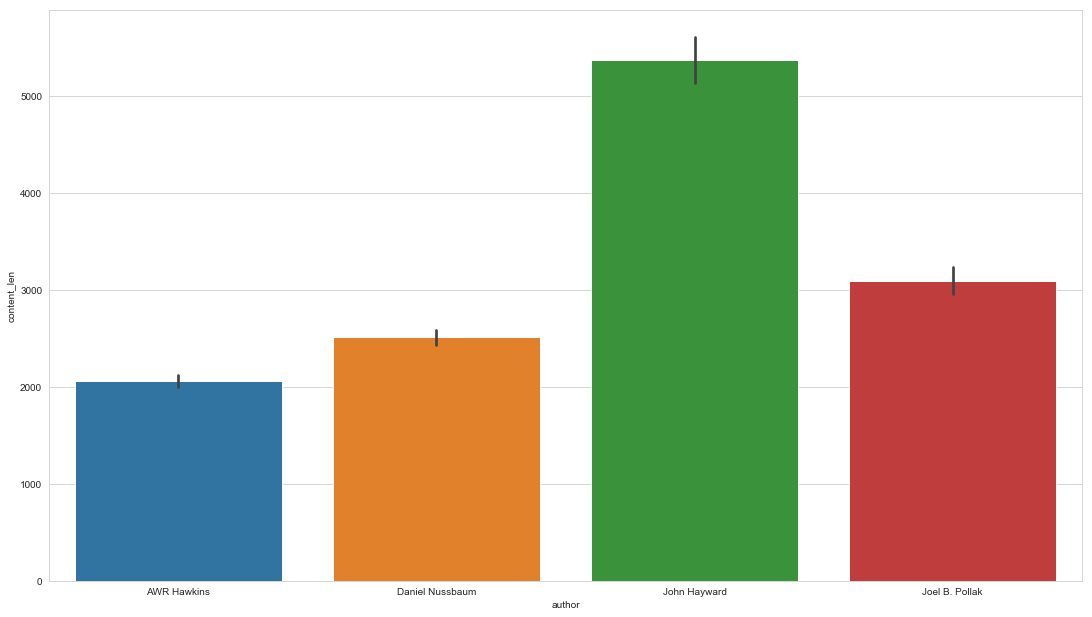

In [66]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="author", y="content_len", data=df.loc[df.author.isin(['John Hayward','Daniel Nussbaum',
                                                                           'AWR Hawkins', 'Joel B. Pollak'])])
plt.show()

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publication", y="content_len", data=df_2.loc[df_2.content_len.between(1000, 10000)])
plt.show()

In [127]:
df_3 = df_2.groupby('author').apply(lambda x: x.sample(500))

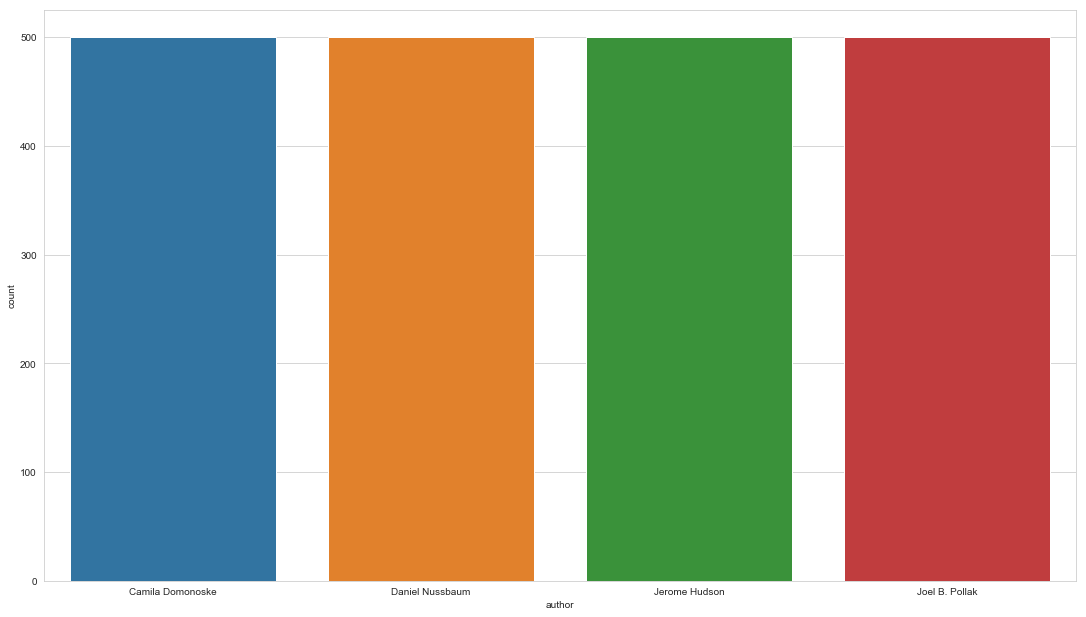

In [128]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.countplot(x="author", data=df_3)
plt.show()

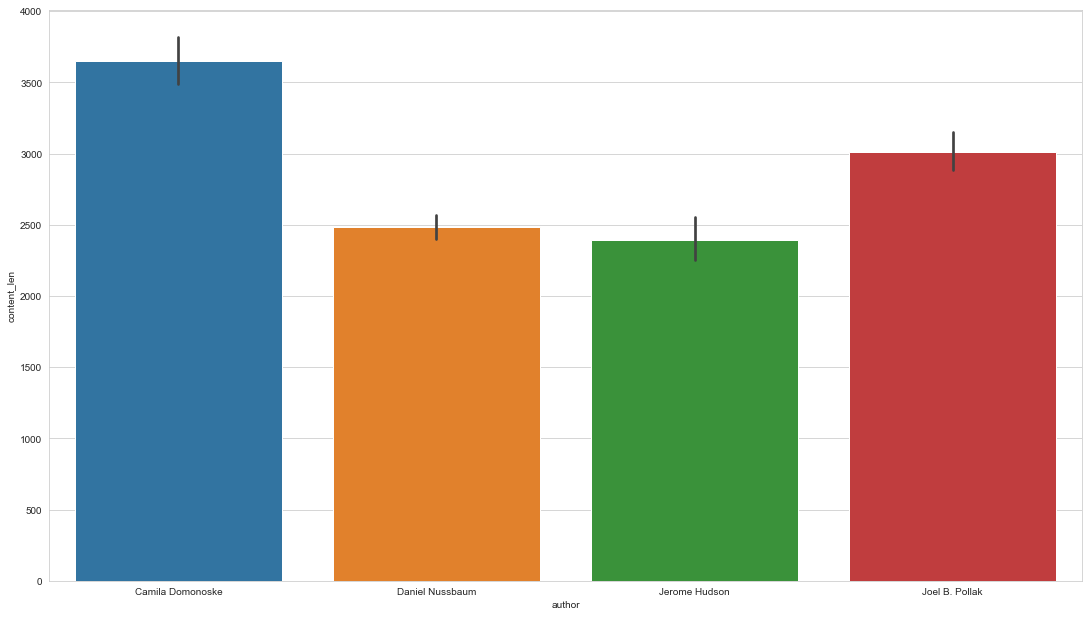

In [129]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="author", y="content_len", data=df_3)
plt.show()

In [133]:
df_3.loc[df_3.author == 'Jerome Hudson','content'].iloc[0]

'Actor Omar Epps hopes an upcoming documentary he produced can help call attention to what he describes as the “pandemic” of fatherless families in America. [Daddy Don’t Go  —   about four young men struggling to be the best fathers they can be  —   will premiere on video platform Vimeo on Father’s Day in an effort to “activate” fathers across the country.  “I think the traditional family structure has been eviscerated, certainly within impoverished communities,” the    former House star told the Los Angeles Times in an interview. “There’s one thing to be someone’s biological father. But there’s another thing to actually actively father a child and take the reigns of that responsibility. ” According to a synopsis, the film took two years to shoot and centers on four disadvantaged fathers in New York City as they “struggle to beat the odds and defy the deadbeat dad stereotype. ” Epps, who is now a father of three, says the project was special because as a child he didn’t know his own fa

In [ ]:
df_3.head()

In [134]:
df_3.to_csv('cleanish_data_authors.csv')